# Predicting car sales price

In this project, I'll practice the machine learning workflow using k-nearest neighbors algorithm I've learned so far to predict a car's market price using its attributes.

Reading in the data:

In [1]:
import pandas as pd
cols = ['symboling','normalized_losses','make', 'fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length', 'width', 'height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars = pd.read_csv('imports-85.data', names=cols)

In [2]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


I noticed that the column *normalized_losses* has missing values which cannot be used for predictive modelling. I will fill these values with NaN and look for missing values in other columns.

In [3]:
import numpy as np
cars = cars.replace('?', np.nan)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

Column that supposed to be numeric type but are in non-numeric type: *normalized_losses, num_doors, num_cylinders, bore, stroke, horsepower, peak_rpm, price*. I will convert these columns to numeric type.

In [5]:
numeric_to_be = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for col in numeric_to_be:
    cars[col] = cars[col].astype(float).copy()

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [7]:
cars['normalized_losses'].isnull().sum()

41

There are 41 missing values in the column *normalized_losses* (20% of the dataset). 

In [8]:
cars[cars['price'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


There are 4 rows with missing values for both *price* and *normalized_losses* columns. I will remove these rows because acutal sale price is essential for my model.

In [9]:
cars = cars.drop(cars[cars['price'].isnull()].index)

In [10]:
cars[cars['price'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


Since there is still 37 missing values in *normalized_losses* column, dropping these rows mean losing a big portion of the data set. I will replace these value with the average values from this column. 

In [11]:
mean_losses = cars['normalized_losses'].mean()
cars['normalized_losses'] = cars['normalized_losses'].replace(np.nan, mean_losses)

In [12]:
cars['normalized_losses'].head()

0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalized_losses, dtype: float64

I will do the same for other columns with missing values, using average value for numeric type columns (mean), and most frequent value (mode) for non-numeric type columns.

In [13]:
to_fill_cols = ['bore', 'stroke', 'horsepower','peak_rpm']
for col in to_fill_cols:
    cars[col] = cars[col].replace(np.nan, cars[col].mean())

In [14]:
cars.describe(include='all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.00000,201,201,201,199,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,113,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


The column *num_doors* is non-numeric type so I will use the mode to fill missing values.

In [15]:
cars['num_doors'].value_counts(dropna=False)

four    113
two      86
NaN       2
Name: num_doors, dtype: int64

In [16]:
cars['num_doors'].mode()

0    four
dtype: object

In [17]:
cars['num_doors'] = cars['num_doors'].fillna('four')
cars['num_doors'].value_counts(dropna=False)

four    115
two      86
Name: num_doors, dtype: int64

Next I will normalize the numeric columns so all values range from 0 to 1. Normalization makes the training process faster and less sensitive to the scale of the features. 

In [18]:
num_cols = cars.select_dtypes(include=np.number).columns.tolist()

In [19]:
from sklearn import preprocessing as prep
df_norm = prep.normalize(cars[num_cols], axis=0)
cars_norm = pd.DataFrame(df_norm, columns=num_cols)
cars_norm.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.140334,0.068238,0.063136,0.068178,0.068585,0.063953,0.068932,0.068699,0.073249,0.057771,0.058127,0.071234,0.068617,0.057011,0.060592,0.061795
1,0.140334,0.068238,0.063136,0.068178,0.068585,0.063953,0.068932,0.068699,0.073249,0.057771,0.058127,0.071234,0.068617,0.057011,0.060592,0.075555
2,0.046778,0.068238,0.067341,0.069148,0.070083,0.068671,0.076372,0.080325,0.056572,0.074800,0.058127,0.098829,0.068617,0.051581,0.058348,0.075555
3,0.093556,0.091730,0.071117,0.071329,0.070832,0.071161,0.063224,0.057602,0.067338,0.073291,0.064585,0.065458,0.075478,0.065155,0.067324,0.063879
4,0.093556,0.091730,0.070832,0.071329,0.071046,0.071161,0.076399,0.071870,0.067338,0.073291,0.051668,0.073801,0.075478,0.048866,0.049371,0.079905


Let's start with some univariate k-nearest neighbors models. I will create a function, named knn_train_test() that encapsulates the training and simple validation process. This function will:
- Shuflle the data set to get random row order.
- Split the data set and use 75% of data for training and 25% for testing univariate models.
- Calculate and return root mean square error (RMSE).

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(42)
    random_array = np.random.permutation(df.shape[0])
    random_df = df.loc[random_array]
    split_index = int(round(random_df.shape[0] * 0.75, 0))
    train_df = random_df.head(split_index)
    test_df = random_df.tail(random_df.shape[0] - split_index)
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_col].to_frame(), train_df[target_col])
    predictions = knn.predict(test_df[train_col].to_frame())
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse

In [36]:
rmse_dict = {}
for col in num_cols[:-1]:
    rmse_dict[col] = knn_train_test(col, 'price', cars_norm)

In [37]:
sorted(rmse_dict.items(), key=lambda x:x[1], reverse=True)

[('symboling', 0.038296473913303514),
 ('height', 0.032492763981592246),
 ('normalized_losses', 0.02962120368657837),
 ('peak_rpm', 0.02942356627002374),
 ('bore', 0.02838544180932649),
 ('stroke', 0.02772354556895081),
 ('compression_ratio', 0.02585895133946931),
 ('wheel_base', 0.02533265923596363),
 ('length', 0.025328373726181245),
 ('horsepower', 0.023705519609806623),
 ('curb_weight', 0.022699137176245696),
 ('city_mpg', 0.020139942273028157),
 ('width', 0.01915104192966131),
 ('highway_mpg', 0.018970861643701223),
 ('engine_size', 0.014973076707105031)]

Based on RMSE values of univariate models, five columns that performed the best using the default k value of 5 are: *engine_size, highway_mpg, width, city_mpg, curb_weight*.

Let see if changing the k values improve model fit by modifying the *knn_train_test()* function.

In [38]:
def knn_train_test(train_col, target_col, df, k):
    np.random.seed(42)
    random_array = np.random.permutation(df.shape[0])
    random_df = df.loc[random_array]
    split_index = int(round(random_df.shape[0] * 0.75, 0))
    train_df = random_df.head(split_index)
    test_df = random_df.tail(random_df.shape[0] - split_index)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[train_col].to_frame(), train_df[target_col])
    predictions = knn.predict(test_df[train_col].to_frame())
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse

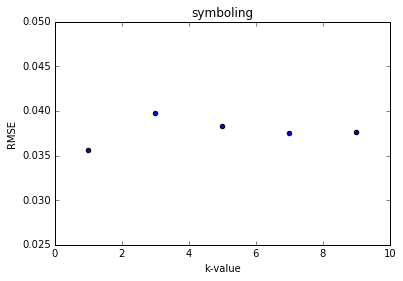

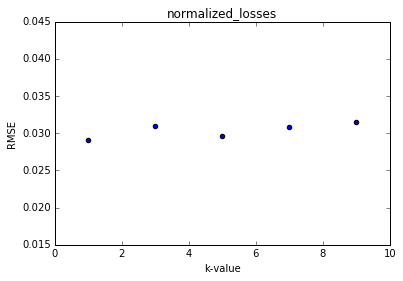

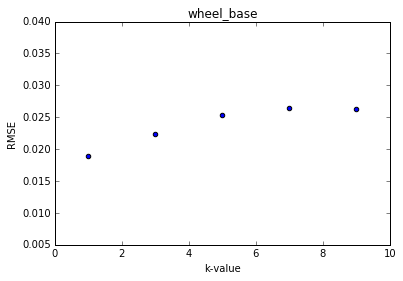

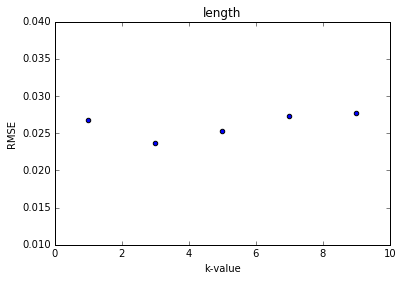

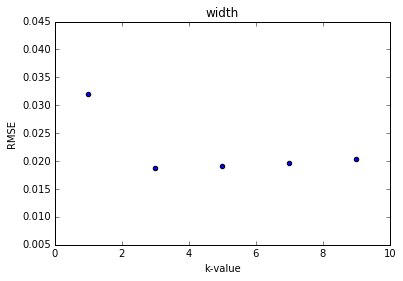

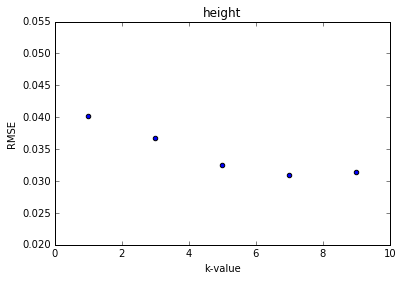

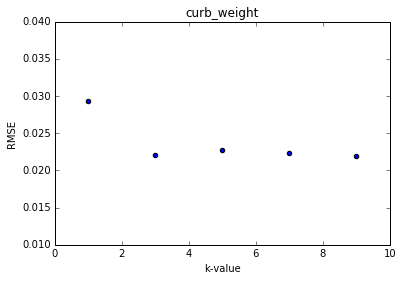

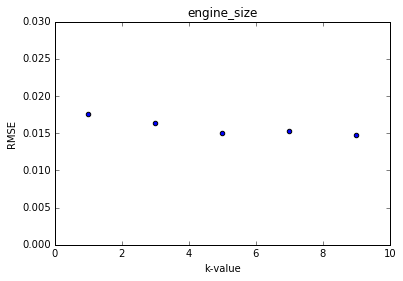

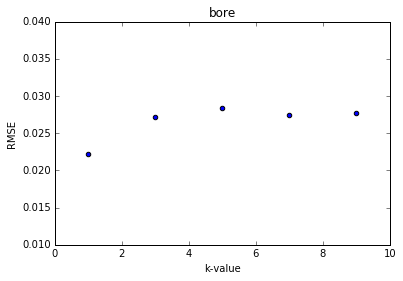

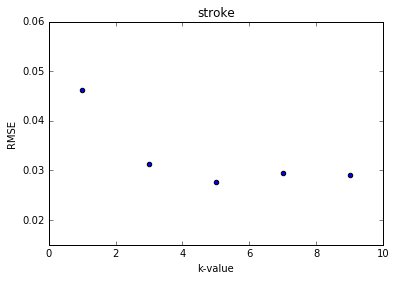

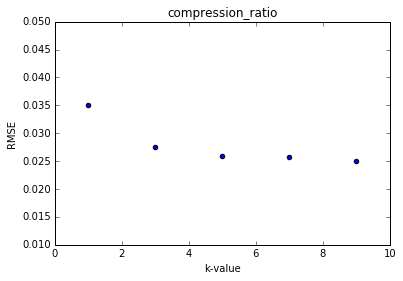

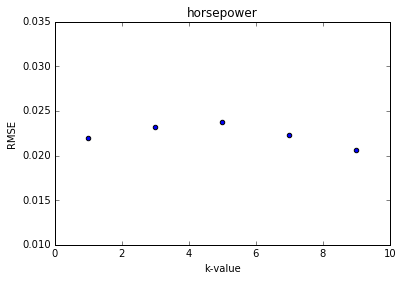

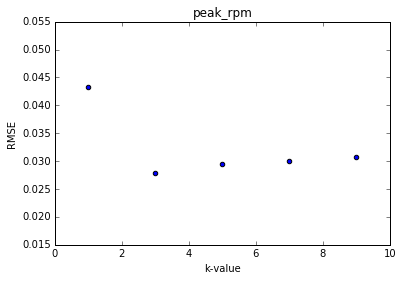

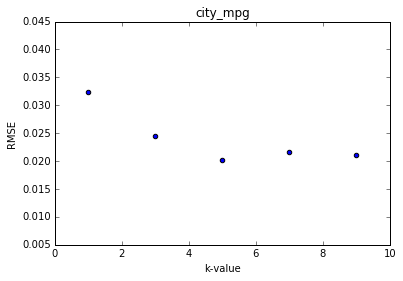

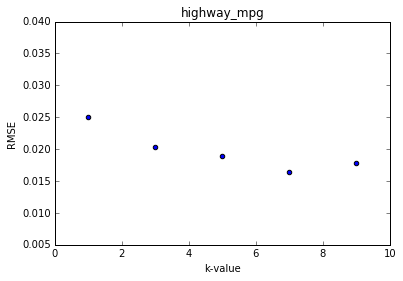

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

hyper_params = [[x for x in range(1,10,2)] for x in range(len(num_cols[:-1]))]
rmse_list = []

for col in num_cols[:-1]:
    rmse_vals = []
    for k in hyper_params[0]:
        rmse = knn_train_test(col, 'price', cars_norm, k)
        rmse_vals.append(rmse)
    rmse_list.append(rmse_vals)
    
plots = zip(hyper_params, rmse_list)
def loop_plot(plots):
    figs={}
    axs={}
    for idx,plot in enumerate(plots):
        figs[idx]=plt.figure()
        axs[idx]=figs[idx].add_subplot(111)
        axs[idx].scatter(plot[0],plot[1])
        axs[idx].set_xlabel('k-value')
        axs[idx].set_ylabel('RMSE')
    return figs, axs

figs, axs = loop_plot(plots)
for i in range(len(num_cols[:-1])):
    axs[i].set_title(num_cols[i])
    

In [40]:
import sys

min_rmse = sys.maxsize

for j, ele in enumerate(rmse_list):
    cur_min = min(float(i) for i in ele)
    if cur_min < min_rmse:
        min_rmse = cur_min
        pos_index = ele.index(min_rmse)
        list_index = j
        col_name = num_cols[list_index]
        k_val = hyper_params[list_index][pos_index]

print('The best fit univariate model was a {0} nearest neighbors model using the column "{1}" as the training feature and achived a RMSE of {2}'.
      format(k_val, col_name, rmse_list[list_index][pos_index]))

The best fit univariate model was a 9 nearest neighbors model using the column "engine_size" as the training feature and achived a RMSE of 0.0148147476000129


Each numeric column resulted in best fit univariate model at different k value, with the best model achieved using the column *engine_size* at k value of 9.

Now let's modify the *knn_train_test()* function to build multivariate model.

In [41]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(42)
    random_array = np.random.permutation(df.shape[0])
    random_df = df.loc[random_array]
    split_index = int(round(random_df.shape[0] * 0.75, 0))
    train_df = random_df.head(split_index)
    test_df = random_df.tail(random_df.shape[0] - split_index)
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse

In [42]:
five_best_features = ['engine_size', 'highway_mpg', 'width', 'city_mpg', 'curb_weight']
rmse_list_multi = []
for i in range(2,6):
    rmse = knn_train_test(five_best_features[:i], 'price', cars_norm)
    rmse_list_multi.append(rmse)
print(rmse_list_multi)

[0.014974787037076866, 0.01471043686558131, 0.014799978985905463, 0.01371667662150623]


The best fit model was achieved using all 5 best features from previous steps with the default k value of 5. The second best model was using 3 features and third was using 4 features.

In [43]:
def knn_train_test(train_cols, target_col, df, k):
    np.random.seed(42)
    random_array = np.random.permutation(df.shape[0])
    random_df = df.loc[random_array]
    split_index = int(round(random_df.shape[0] * 0.75, 0))
    train_df = random_df.head(split_index)
    test_df = random_df.tail(random_df.shape[0] - split_index)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse

The optimal k value for 3 features model is 3
The optimal k value for 4 features model is 3
The optimal k value for 5 features model is 3


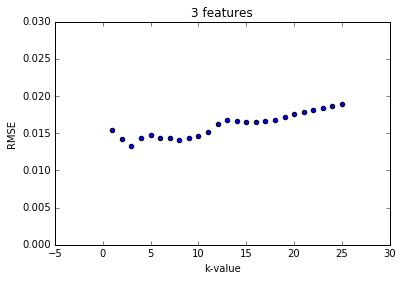

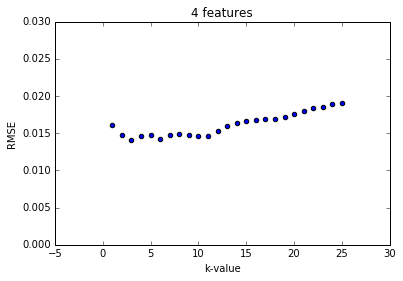

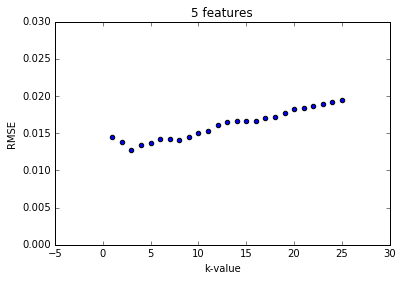

In [44]:
hyper_params_multi = [[x for x in range(1,26)] for x in range(3)]
rmse_list_multi_k = []

for nf in range(3,6):
    rmse_vals = []
    for k in hyper_params_multi[0]:
        rmse = knn_train_test(five_best_features[:nf], 'price', cars_norm, k)
        rmse_vals.append(rmse)
    rmse_list_multi_k.append(rmse_vals)
    opt_k = rmse_vals.index(min(rmse_vals)) + 1
    print('The optimal k value for {} features model is {}'.
          format(nf, opt_k))
    
plots = zip(hyper_params_multi, rmse_list_multi_k)
def loop_plot(plots):
    figs={}
    axs={}
    for idx,plot in enumerate(plots):
        figs[idx]=plt.figure()
        axs[idx]=figs[idx].add_subplot(111)
        axs[idx].scatter(plot[0],plot[1])
        axs[idx].set_xlabel('k-value')
        axs[idx].set_ylabel('RMSE')
    return figs, axs

figs, axs = loop_plot(plots)

name_list = ['{0} features'.format(i) for i in range(3,6)]
for i in range(3):
    axs[i].set_title(name_list[i])

In [47]:
min_rmse_multi = sys.maxsize

for j, ele in enumerate(rmse_list_multi_k):
    cur_min = min(float(i) for i in ele)
    if cur_min < min_rmse_multi:
        min_rmse_multi = cur_min
        pos_index = ele.index(min_rmse_multi)
        list_index = j
        col_num = j + 3
        k_val = hyper_params_multi[list_index][pos_index]

print('The best fit multivariate model was a {0} nearest neighbors model using {1} features for training'.
      format(k_val, col_num))

The best fit multivariate model was a 3 nearest neighbors model using 5 features for training
